### 优化器Optimizer（18/06/21）

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Epoch: 1,w :0.1493956297636032,b:2.093094825744629
Epoch: 2,w :0.40325701236724854,b:3.819654941558838
Epoch: 3,w :0.6236409544944763,b:5.306581974029541
Epoch: 4,w :0.8249329328536987,b:6.560873031616211
Epoch: 5,w :1.0111674070358276,b:7.585493564605713
Epoch: 6,w :1.1832257509231567,b:8.388632774353027
Epoch: 7,w :1.3405343294143677,b:8.98717212677002
Epoch: 8,w :1.4817099571228027,b:9.407256126403809
Epoch: 9,w :1.6050188541412354,b:9.682185173034668
Epoch: 10,w :1.7089109420776367,b:9.848123550415039
Epoch: 11,w :1.7926123142242432,b:9.939172744750977
Epoch: 12,w :1.8565751314163208,b:9.983596801757812
Epoch: 13,w :1.9026086330413818,b:10.002053260803223
Epoch: 14,w :1.933628797531128,b:10.007887840270996
Epoch: 15,w :1.9531364440917969,b:10.008606910705566
Epoch: 16,w :1.9646002054214478,b:10.007842063903809
Epoch: 17,w :1.9709807634353638,b:10.007020950317383
Epoch: 18,w :1.9744921922683716,b:10.006495475769043
Epoch: 19,w :1.9765851497650146,b:10.006243705749512
Epoch: 20,w :1.

<function matplotlib.pyplot.show(*args, **kw)>

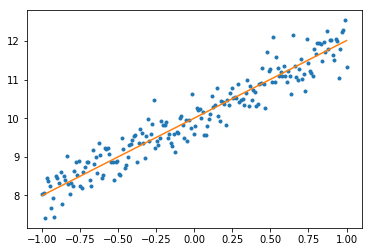

In [24]:
train_X = np.linspace(-1,1,200)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.33 + 10

X = tf.placeholder("float32")
Y = tf.placeholder("float32")
w = tf.Variable(0.0, name ="weight")
b = tf.Variable(0.0, name = "bias")

loss = tf.square(Y - X *w -b)
#train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
#train = tf.train.AdadeltaOptimizer(0.9).minimize(loss)
#train = tf.train.AdagradOptimizer(0.5).minimize(loss)
train = tf.train.AdamOptimizer(0.01).minimize(loss)\


with tf.Session() as sess:
    tf.global_variables_initializer().run()
    epoch = 1
    for i in range(50):
        for (x,y) in zip(train_X, train_Y):
            _,w_value,b_value = sess.run([train,w,b], feed_dict= {X: x ,Y :y})
        print("Epoch: {},w :{},b:{}".format(epoch,w_value,b_value))
        epoch +=1
    
plt.plot(train_X,train_Y,'.')
plt.plot(train_X,train_X.dot(w_value)+ b_value)
plt.show